In [4]:
# eda_analysis.py

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os

In [6]:

# Load .env
load_dotenv()
DATABASE_URL = os.getenv("DATABASE_URL")
engine = create_engine(DATABASE_URL)

# Load final features
df = pd.read_sql("SELECT * FROM final_features", engine, parse_dates=["date"])

In [8]:
df.head()

,ticker,date,close,volume,return_1d,sma_5,sma_20,ema_10,rsi_14,macd,...,roe,capexPerShare,fetched_at_x,interest_rate,cpi,unemployment,fetched_at_y,merged_at,target_return_5d,trade_signal
0,NVDA,1999-01-22,0.041016,2714688000,NaN,NaN,NaN,0.041016,NaN,0.000000,...,NaN,NaN,NaT,4.63,164.3,4.3,2025-06-20 05:38:26.502628,2025-06-20 10:39:04.918889+00:00,-0.034938,SELL
1,NVDA,1999-01-25,0.045313,510480000,0.104764,NaN,NaN,0.041797,NaN,0.000343,...,NaN,NaN,NaT,4.63,164.3,4.3,2025-06-20 05:38:26.502628,2025-06-20 10:39:04.918889+00:00,-0.109196,SELL
2,NVDA,1999-01-26,0.041797,343200000,-0.077594,NaN,NaN,0.041797,NaN,0.000327,...,NaN,NaN,NaT,4.63,164.3,4.3,2025-06-20 05:38:26.502628,2025-06-20 10:39:04.918889+00:00,-0.109027,SELL
3,NVDA,1999-01-27,0.041667,244368000,-0.003110,NaN,NaN,0.041774,NaN,0.000300,...,NaN,NaN,NaT,4.63,164.3,4.3,2025-06-20 05:38:26.502628,2025-06-20 10:39:04.918889+00:00,-0.087503,SELL
4,NVDA,1999-01-28,0.041536,227520000,-0.003144,0.042266,NaN,0.041730,NaN,0.000266,...,NaN,NaN,NaT,4.63,164.3,4.3,2025-06-20 05:38:26.502628,2025-06-20 10:39:04.918889+00:00,-0.034476,SELL


In [12]:

# --- OVERVIEW ---
print("\n🔎 Basic Info")
print(df.info())


🔎 Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6643 entries, 0 to 6642
Data columns (total 81 columns):
 #   Column                                  Non-Null Count  Dtype              
---  ------                                  --------------  -----              
 0   ticker                                  6643 non-null   object             
 1   date                                    6643 non-null   datetime64[ns]     
 2   close                                   6643 non-null   float64            
 3   volume                                  6643 non-null   int64              
 4   return_1d                               6642 non-null   float64            
 5   sma_5                                   6639 non-null   float64            
 6   sma_20                                  6624 non-null   float64            
 7   ema_10                                  6643 non-null   float64            
 8   rsi_14                                  6630 non-null   float64 

In [13]:
print("\n📊 Summary Statistics")
print(df.describe())


📊 Summary Statistics
                                date        close        volume    return_1d  \
count                           6643  6643.000000  6.643000e+03  6642.000000   
mean   2012-04-04 01:12:24.061417728    10.239618  5.948304e+08     0.001941   
min              1999-01-22 00:00:00     0.034115  1.968000e+07    -0.352336   
25%              2005-08-29 12:00:00     0.283375  3.327580e+08    -0.016300   
50%              2012-04-03 00:00:00     0.471750  4.960040e+08     0.001309   
75%              2018-11-06 12:00:00     4.952750  7.264860e+08     0.018440   
max              2025-06-18 00:00:00   149.429993  9.230856e+09     0.424148   
std                              NaN    26.974868  4.297518e+08     0.037825   

             sma_5       sma_20       ema_10       rsi_14         macd  \
count  6639.000000  6624.000000  6643.000000  6630.000000  6643.000000   
mean     10.202225    10.064956    10.142832    53.665796     0.139724   
min       0.035208     0.035742    

In [14]:
print("\n📈 Class Distribution:")
print(df['trade_signal'].value_counts())


📈 Class Distribution:
trade_signal
BUY     3006
SELL    2330
HOLD    1307
Name: count, dtype: int64


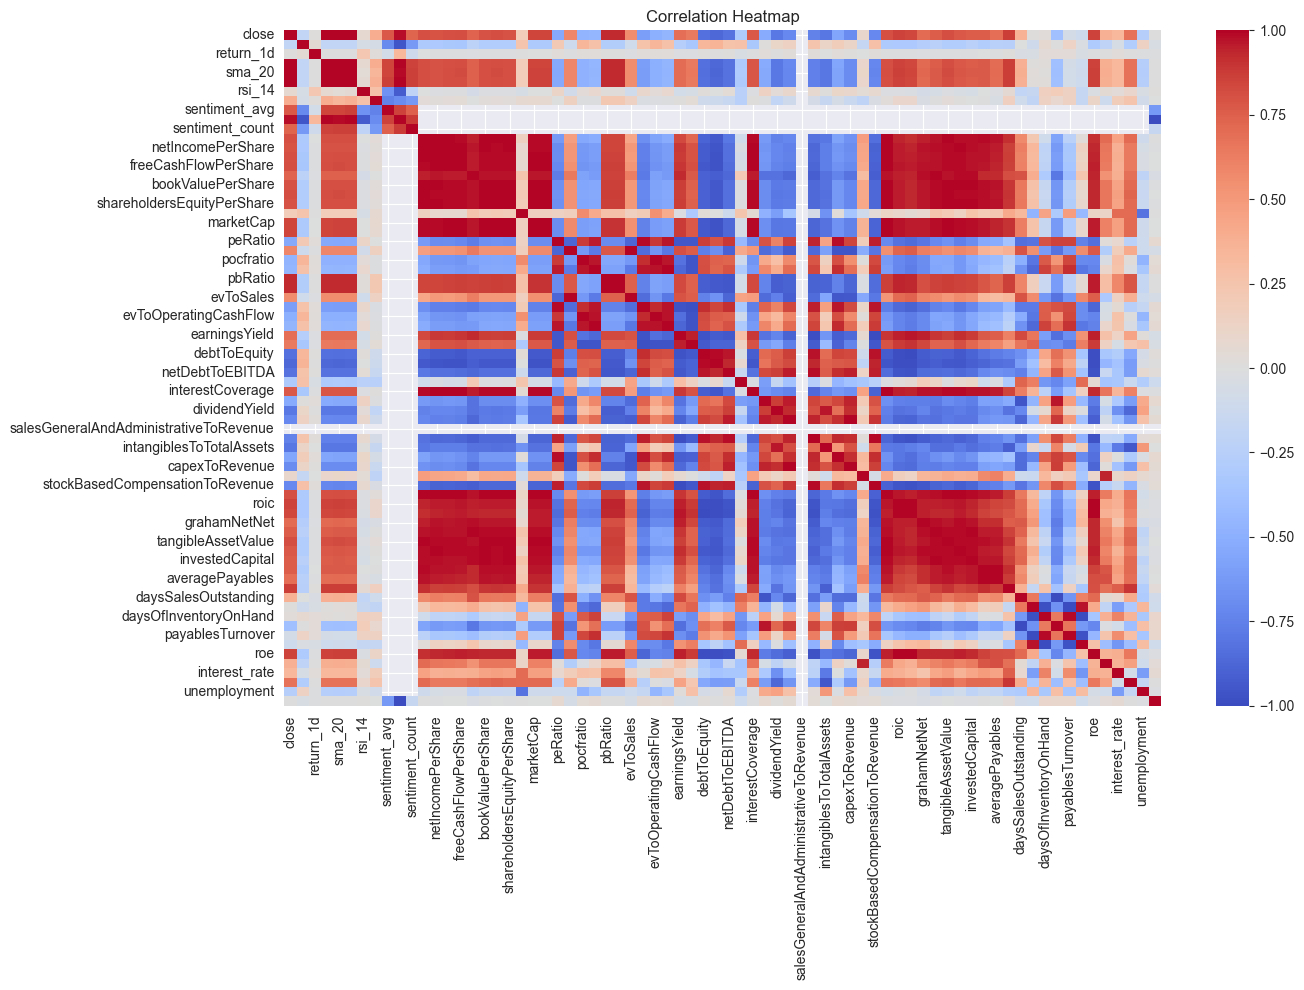

In [15]:

# --- CORRELATION HEATMAP ---
plt.figure(figsize=(14, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

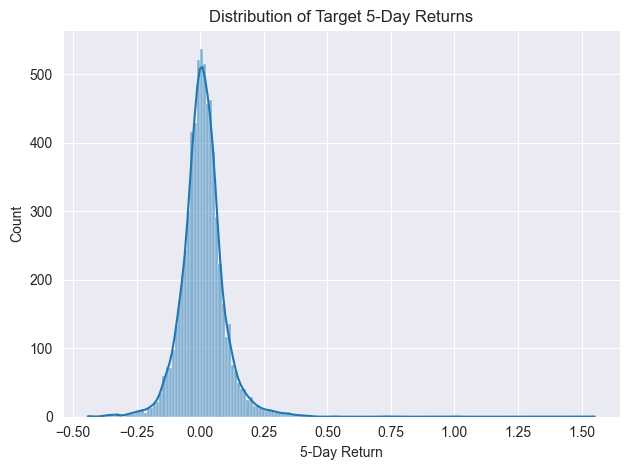

In [16]:

# --- TARGET DISTRIBUTION ---
sns.histplot(df['target_return_5d'].dropna(), kde=True)
plt.title("Distribution of Target 5-Day Returns")
plt.xlabel("5-Day Return")
plt.tight_layout()
plt.show()

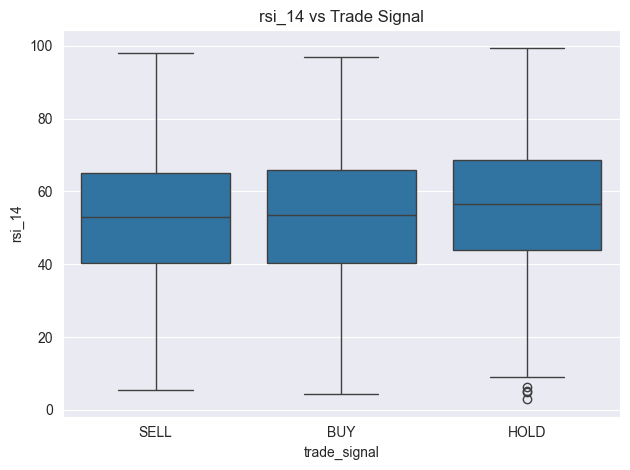

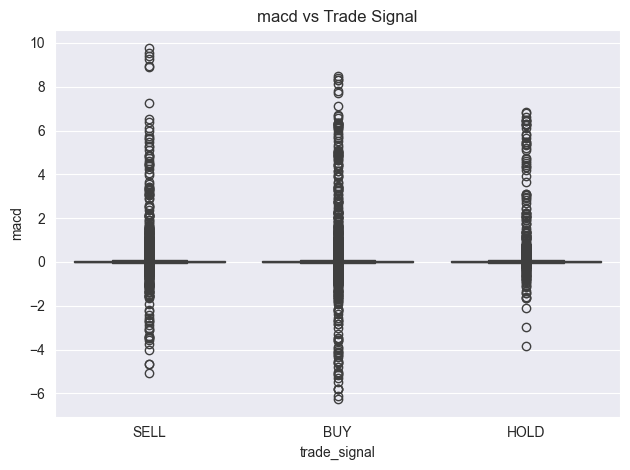

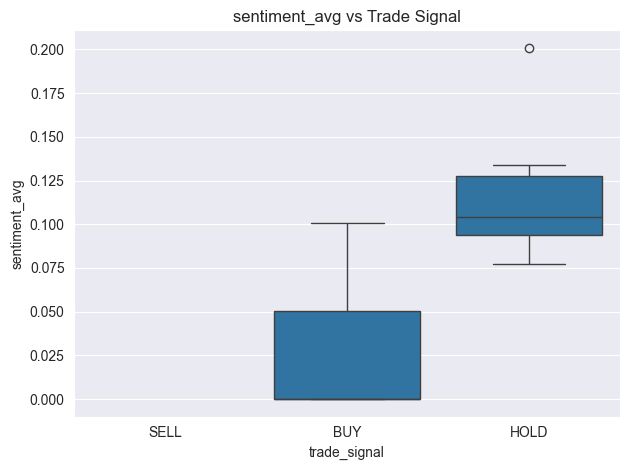

In [17]:

# --- FEATURE VS TARGET ---
example_features = ['rsi_14', 'macd', 'sentiment_avg']
for feature in example_features:
    if feature in df.columns:
        sns.boxplot(x='trade_signal', y=feature, data=df)
        plt.title(f"{feature} vs Trade Signal")
        plt.tight_layout()
        plt.show()

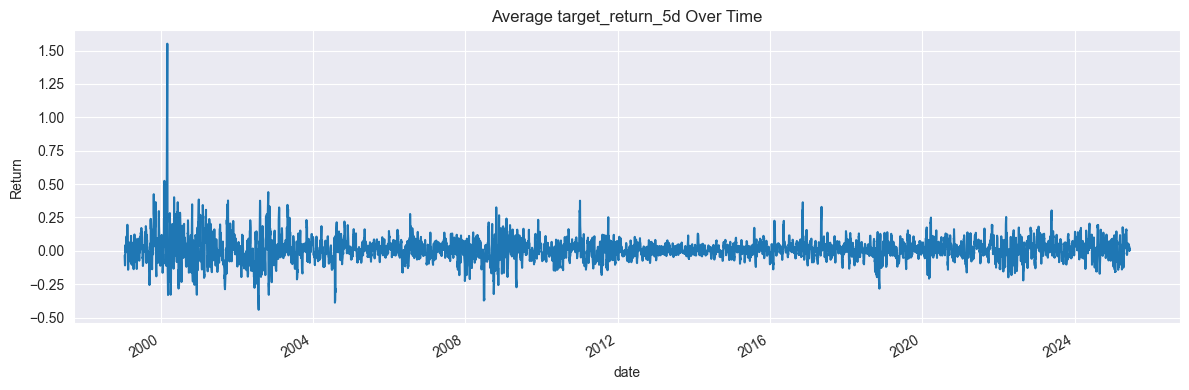

In [18]:

# --- TIME TREND (Optional) ---
trend_feature = 'target_return_5d'
plt.figure(figsize=(12, 4))
df.groupby('date')[trend_feature].mean().plot()
plt.title(f"Average {trend_feature} Over Time")
plt.ylabel("Return")
plt.tight_layout()
plt.show()
